# Section B

a. Implement the k-means clustering algorithm from scratch. Ensure that your im-
plementation includes:

(a) Initialization: Use the given centroids as starting points.

(b) Assignment: Assign each data point to the nearest centroid based
on the Euclidean distance.

(c) Update: Recalculate the centroids after each assignment by comput-
ing the mean of all points assigned to each centroid.

(d) Convergence Check: Terminate the algorithm if centroids do not
significantly change between iterations or after a maximum of 100 iterations.
Use a convergence threshold of 1e-4.

Reference:

- [Github: K-Means from Scratch](https://github.com/aihubprojects/Machine-Learning-From-Scratch/blob/master/K-Means%20from%20Scratch.ipynb)
- [Medium: K-means from Scratch](https://medium.com/@rishit.dagli/build-k-means-from-scratch-in-python-e46bf68aa875)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
class K_Means:
    def __init__(self, k=2, tolerance = 1e-4, max_iter = 100):
        self.k = k
        self.max_iterations = max_iter
        self.tolerance = tolerance
        self.centroids = {}
        self.init_centroids = None
        self.inertia_ = None
    
    def euclidean_distance(self, point, data):
        return np.sqrt(np.sum((point - data)**2, axis=0))
        
    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
    def fit(self, data, init_centroids = None):
        if init_centroids is None:
            indices = np.random.choice(len(data), self.k, replace=False)
            self.centroids = {i: data[idx] for i, idx in enumerate(indices)}
        else:
            self.centroids = {i: init_centroids[i] for i in range(self.k)}
        self.init_centroids = self.centroids.copy()
        for i in range(self.max_iterations):
            self.classes = {j: [] for j in range(self.k)}

            for point in data:
                distances = [self.euclidean_distance(point, self.centroids[index]) for index in self.centroids]
                cluster_index = np.argmin(distances)
                self.classes[cluster_index].append(point)

            previous = dict(self.centroids)

            for cluster_index in self.classes:
                if len(self.classes[cluster_index]) > 0:
                    self.centroids[cluster_index] = np.mean(self.classes[cluster_index], axis=0)
                else:
                    self.centroids[cluster_index] = previous[cluster_index]

            is_optimal = True
            for centroid in self.centroids:
                original_centroid = previous[centroid]
                curr_centroid = self.centroids[centroid]
                if np.sum((curr_centroid - original_centroid) ** 2) > self.tolerance:
                    is_optimal = False
            print("Iteration", i, "completed")
            if is_optimal:
                break
        self.inertia_ = self.inertia(data)
        
    def inertia(self, data):
        inertia = 0
        for cluster_index, points in self.classes.items():
            for point in points:
                inertia += np.sum((point - self.centroids[cluster_index]) ** 2)
        return inertia
    
    def plot_clusters(self, data, title="Clusters"):
        plt.figure(figsize=(8, 6))
        for cluster_index, points in self.classes.items():
            points = np.array(points)
            if len(points) > 0:
                plt.scatter(
                    points[:, 0],
                    points[:, 1],
                    label=f"Cluster {cluster_index + 1}"
                )
        for centroid in self.centroids:
            plt.scatter(
                self.centroids[centroid][0],
                self.centroids[centroid][1],
                color="red",
                marker="x",
                s=200,
                label=f"Final Centroid {centroid + 1}",
            )
        for i, centroid in enumerate(self.init_centroids.values()):
            plt.scatter(
                centroid[0],
                centroid[1],
                color="blue",
                marker="o",
                s=200,
                label=f"Initial Centroid {i + 1}",
                edgecolor="black",
                linewidth=1.5
            )

        plt.title(title)
        plt.xlabel("X1")
        plt.ylabel("X2")
        plt.legend()
        plt.grid()
        plt.show()


In [30]:
X = np.array([
    [5.1, 3.5], 
    [4.9, 3.0], 
    [5.8, 2.7], 
    [6.0, 3.0], 
    [6.7, 3.1], 
    [4.5, 2.3],
    [6.1, 2.8], 
    [5.2, 3.2], 
    [5.5, 2.6], 
    [5.0, 2.0], 
    [8.0, 0.5], 
    [7.5, 0.8],
    [8.1, -0.1], 
    [2.5, 3.5], 
    [1.0, 3.0], 
    [4.5, -1.0], 
    [3.0, -0.5], 
    [5.1, -0.2],
    [6.0, -1.5], 
    [3.5, -0.1], 
    [4.0, 0.0], 
    [6.1, 0.5], 
    [5.4, -0.5], 
    [5.3, 0.3],
    [5.8, 0.6]
])
initial_centroids = np.array([[3.0, 3.0], [2.0, 2.0]])

In [31]:
kmeans = K_Means()
kmeans.fit(X, init_centroids=initial_centroids)

Iteration 0 completed
Iteration 1 completed
Iteration 2 completed


b. Find the values of final centroids after the algorithm converges. Plot the
two clusters at the start of the process and at the end.

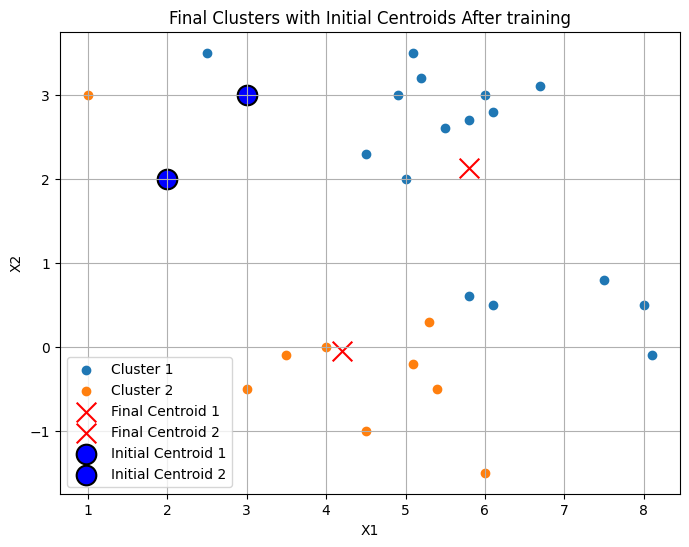

In [32]:
kmeans.plot_clusters(X, title="Final Clusters with Initial Centroids After training")

In [33]:
kmeans.centroids

{0: array([5.8  , 2.125]), 1: array([ 4.2       , -0.05555556])}

c. Compare the results using the provided initial centroids versus using
random initialization of centroids.

In [34]:
kmeans.inertia_

83.67222222222222

In [35]:
random_kmeans = K_Means()
random_kmeans.fit(X)

Iteration 0 completed
Iteration 1 completed
Iteration 2 completed


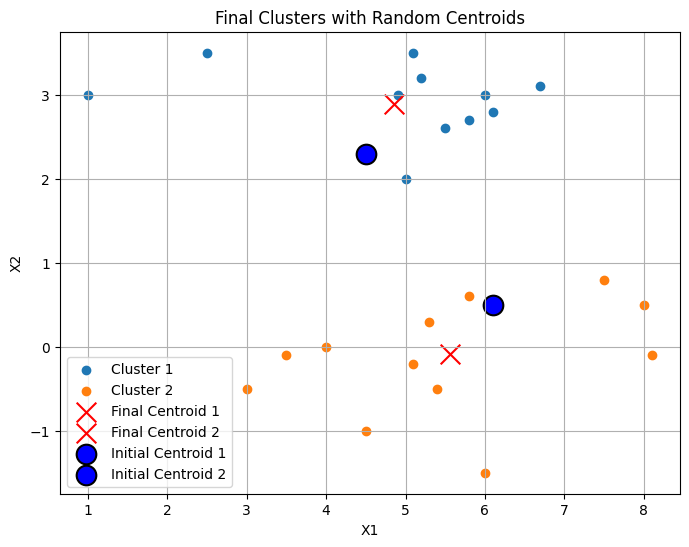

In [ ]:
random_kmeans.plot_clusters(X, title="Final Clusters with Random Centroids")

In [37]:
random_kmeans.centroids

{0: array([4.85833333, 2.89166667]), 1: array([ 5.56153846, -0.09230769])}

In [38]:
random_kmeans.inertia_

67.15833333333335

The inertia value for the graph in the b part is 83.67, and the inertia value for the graph with random centroids is 67.15. A lower inertia value indicates a more compact cluster. In this case, random centroid initialization led to better clustering. This could be because the random centroids were placed closer to the natural groupings of the data, allowing the algorithm to converge to a better solution. Since both the algorithms converge in about 3 iterations, we cannot comment on that aspect.

d. Determine the optimal number of clusters, M, using the Elbow method.
Plot the Within-Cluster Sum of Squares (WCSS) against different values of k to
find the elbow point. Randomly initialize M centroids, perform clustering and plot
the resulting clusters

Reference:

- [Analytics Vidhya: WCSS](https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/#:~:text=WCSS%20is%20the%20sum%20of,is%20largest%20when%20K%20%3D%201.)

Iteration 0 completed
Iteration 1 completed
Iteration 0 completed
Iteration 1 completed
Iteration 0 completed
Iteration 1 completed
Iteration 2 completed
Iteration 0 completed
Iteration 1 completed
Iteration 0 completed
Iteration 1 completed
Iteration 2 completed
Iteration 3 completed
Iteration 0 completed
Iteration 1 completed
Iteration 2 completed
Iteration 3 completed
Iteration 0 completed
Iteration 1 completed
Iteration 2 completed
Iteration 3 completed
Iteration 0 completed
Iteration 1 completed
Iteration 2 completed
Iteration 0 completed
Iteration 1 completed
Iteration 2 completed
Iteration 0 completed
Iteration 1 completed
Iteration 2 completed


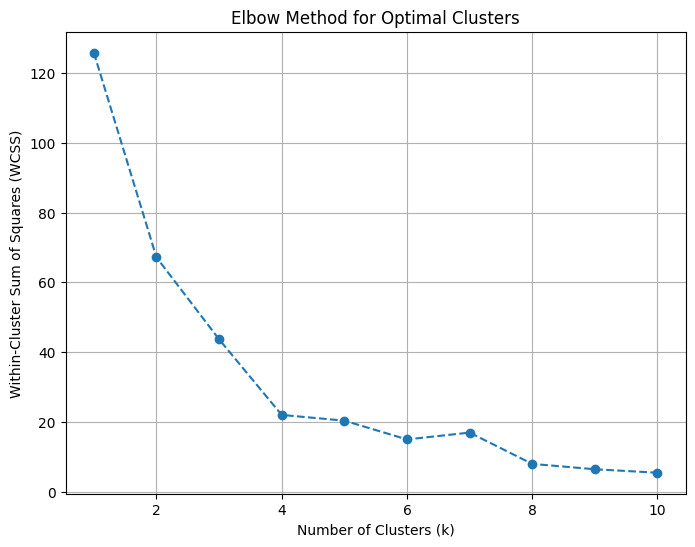

In [41]:
wccs = [] 
for i in range(1, 11):
    kmeans = K_Means(k=i)
    kmeans.fit(X, init_centroids=None)
    wccs.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wccs, marker='o', linestyle='--')
plt.title("Elbow Method for Optimal Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.grid()
plt.show()


We see that the optimal value of M is 4, where the decrease of WCSS slows down significantly.

In [42]:
random_kmeans = K_Means(k = 4)
random_kmeans.fit(X)

Iteration 0 completed
Iteration 1 completed
Iteration 2 completed
Iteration 3 completed
Iteration 4 completed


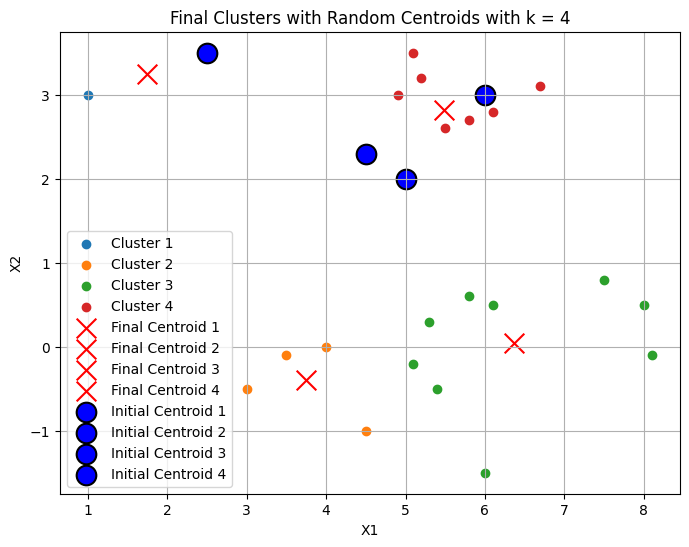

In [46]:
random_kmeans.plot_clusters(X, title="Final Clusters with Random Centroids with k = 4")

In [44]:
random_kmeans.centroids

{0: array([1.75, 3.25]),
 1: array([ 3.75, -0.4 ]),
 2: array([6.36666667, 0.04444444]),
 3: array([5.48, 2.82])}

In [45]:
random_kmeans.inertia_

24.15422222222222